# Série 5
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices pour la semaine prochaine.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. **Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.**

Les tentatives infructueuses, les explications, commentaires et analyses des échecs **rapportent des points**. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Exercice 1
Vous allez devoir implémenter un algorithme pour trouver la meilleure combinaison dans la multiplication de n matrices  M<sub>1</sub>, ..., M<sub>n</sub> dont le vecteur D=(d<sub>0</sub>,d<sub>1</sub>,...d<sub>n</sub>) fournit les dimenstion de la matrice M<sub>i</sub> = d<sub>i-1</sub> × d<sub>i</sub>

Vous devez:
* générer un nombre entier aléatoire *random* plus grand ou égal à 3 (le nombre de matrices)  
* générer un vecteur de *random*+1 dimensions aléatoires comprises entre, 2 et 19: D<sub>*random*</sub>
* générer random matrices à valeurs entières M<sub>i</sub> de dimension d<sub>i-1</sub> × d<sub>i</sub> pour i = 1, ..., *random*
* programmer l'algorithme de recherche de la meilleures combinaison
* trouver la meilleure combinaison et multiplier leurs matrices selon la meilleure combinaison
* tester éventuellement avec des combinaisons aléatoires de leur suite de matrices (pour ce dernier exercice, il faut implémenter un compteur de multiplications scalaires dans la fonction de multiplication matricielle)

In [ ]:
import sys
class MatrixMult:
    nmbre_matr = 1
    dimensions = []
    MAX_VALUE = sys.maxsize

    def __init__(self, dimensions, nmbre_matr):
        self.nmbre_matr = nmbre_matr
        self.dimensions = dimensions
        self.best_pivot = [[0 for i in range(nmbre_matr+1)] for j in range(nmbre_matr+1)]
        self.pivots_in_postorder = []

    def best_n_mult(self,high):
        print(high)
        best_value = [[0 for i in range(high+1)] for j in range(high+1)]
        h=2
        while h<=high:
            l=h-2
            while l>=0:
                min_n_mult = self.MAX_VALUE+1
                i=l+1
                while i<=h-1:
                    n_mult = self.dimensions[l]*self.dimensions[i]*self.dimensions[h] + best_value[l][i] + best_value[i][h]
                    if min_n_mult > n_mult:
                        min_n_mult = n_mult
                        self.best_pivot[l][h] = i
                    i+=1
                best_value[l][h] = min_n_mult
                print(l,h,best_value[l][h])
                l-=1
            h+=1
        print(best_value)
        return best_value[0][high]

    def write_pivots_in_postorder(self,l,h):
        if ( l+1 < h ):
            b = self.best_pivot[l][h]
            self.write_pivots_in_postorder(l, b)
            self.write_pivots_in_postorder(b, h)
            self.pivots_in_postorder.append(b)
            print(b)

# Fonction qui génère "nmbre_matr" matrices.
# Chaque matrice aura une taille de di-1 × di où i = 0..., nmbre_matr
def generate_matrices(dimensions, nmbre_matr):
    matrices = {}
    # Nous créons une matrice à la fois (jusqu'à atteindre nmbre_matr matrices créées)
    for i in range(0, nmbre_matr):
        # Nous lui attribuons les bonnes dimensions.
        new_matrix = [ [0]*dimensions[i+1] for x in range(0, dimensions[i])]
        # Nous ajoutons un entier aléatoire dans chaque cellule de la matrice
        for j in range(0, dimensions[i]):
            for k in range(0, dimensions[i+1]):
                new_matrix[j][k] = random.randint(0, 20)
        # Nous ajoutons la matrice nouvellement créée au dictionnaire de résultat :
        # matrices{numéro_de_matrice: nouvelle_matrice}
        matrices[i] = new_matrix
    return matrices

# Fonction qui multiplie deux matrices ensemble
def multiply_matrices(m1, m2):
    #print(m1, " * ", m2)
    m3 = [[0 for i in range(len(m2[0]))] for j in range(len(m1))]
    for i in range(len(m1)):
        for j in range(len(m2[0])):
            for k in range(len(m2)):
                m3[i][j] += m1[i][k] * m2[k][j]
    return m3

# Fonction qui multiplie les matrices dans le bon ordre.
def do_operation(pivots, matrices):
    # Dictionnaire curr_state sous la forme de {chaîne: matrice}
    # où la chaîne correspond aux matrices qui ont été multipliées pour obtenir la matrice (valeur)
    curr_state = {}
    # Pour chaque pivot (ce sera la bonne matrice pour la multiplication), nous le recherchons dans la liste des clés
    # (c'est-à-dire qu'il a déjà été utilisé dans une multiplication précédente).
    # S'il est présent, nous sauvegardons m2. S'il n'est pas présent, le pivot est une matrice "unique" (c'est-à-dire qu'elle n'a pas encore été utilisée dans une multiplication)
    for i in range(0, len(pivots)):
        curr_pivot = pivots[i]
        m1 = []
        m2 = []
        new_string = ""
        for key in list(curr_state):
            # Utilisez split() pour séparer la chaîne en plusieurs parties.
            # Cela évitera de trouver un "1" lorsque nous avons un "12" mais pas de "1" seul par exemple.
            split_key = key.split("-")
            if str(curr_pivot) in split_key:
                m2 = curr_state[key]
                new_string = key + "-" + str(curr_pivot)
                curr_state.pop(key)
                break
        else:
            m2 = matrices[curr_pivot]
            new_string = new_string + "-" + str(curr_pivot)
        # Ensuite, nous recherchons m1 (la matrice de gauche pour la multiplication) pour chaque pivot-1,
        # nous vérifions s'il est présent dans la liste des clés.
        # S'il l'est, nous sauvegardons m1. S'il ne l'est pas, nous avons également une matrice "unique".
        # Nous effectuons la multiplication avec m1 et m2
        for key in list(curr_state):
            # Utilisez split() pour séparer la chaîne en plusieurs parties.
            # Cela évitera de trouver un "1" lorsque nous avons un "12" mais pas de "1" seul par exemple.
            split_key = key.split("-")
            if str(curr_pivot-1) in split_key:
                m1 = curr_state[key]
                new_string = key + "-" + str(curr_pivot)
                curr_state.pop(key)
                break
        else:
            m1 = matrices[curr_pivot-1]
            new_string = new_string + "-" + str(curr_pivot-1)
        # Nous avons m1 et m2, maintenant nous effectuons la multiplication avec m1 et m2
        temp = multiply_matrices(m1, m2)
        # Nous mettons à jour curr_state
        curr_state[new_string] = temp
    return list(curr_state.items())[0][1]

import random
nmbre_matr = random.randint(2, 18) # Nombre de matrices
dimensions = [0] * (nmbre_matr+1) # vecteur de dimensions
# Remplit le vecteur de dimensions avec nmbre_matr+1 nombres aléatoires entre 2 et 19
for i in range(0, nmbre_matr+1):
    n = random.randint(2, 19)
    dimensions[i] = n
print("Vecteur de dimensions :")
print(nmbre_matr, dimensions)
print()

# Génère les matrices aléatoires
matrices = generate_matrices(dimensions, nmbre_matr)
print("Matrices aléatoires :")
print(matrices)
print()
a = MatrixMult(dimensions, nmbre_matr)
print("best_n_mult :")
a.best_n_mult(nmbre_matr)
print()
print("write_pivots_in_postorder :")
a.write_pivots_in_postorder(0, nmbre_matr)
print()

pivots = a.pivots_in_postorder
final_matrix = do_operation(pivots, matrices)

print("Matrice finale :")
print(final_matrix)


Vecteur de dimensions :
14 [14, 17, 6, 3, 6, 6, 10, 15, 13, 9, 14, 5, 10, 18, 8]

Matrices aléatoires :
{0: [[5, 9, 12, 10, 13, 0, 17, 12, 4, 1, 7, 12, 13, 10, 13, 3, 1], [9, 4, 20, 15, 0, 3, 19, 15, 11, 9, 5, 12, 1, 15, 20, 15, 9], [4, 0, 9, 5, 18, 6, 0, 8, 17, 14, 4, 20, 6, 4, 18, 17, 11], [0, 1, 20, 3, 0, 20, 4, 12, 1, 16, 9, 18, 15, 19, 13, 13, 14], [8, 2, 3, 10, 11, 6, 14, 3, 9, 5, 1, 9, 9, 18, 18, 3, 10], [16, 0, 5, 17, 4, 16, 1, 0, 9, 1, 9, 0, 10, 3, 10, 8, 7], [2, 2, 13, 19, 7, 19, 10, 6, 18, 20, 16, 10, 18, 1, 9, 0, 2], [6, 3, 14, 10, 8, 5, 9, 13, 20, 13, 20, 0, 17, 4, 5, 1, 7], [17, 6, 7, 12, 17, 11, 5, 9, 12, 20, 0, 13, 6, 18, 1, 2, 0], [12, 19, 4, 2, 11, 11, 0, 4, 17, 18, 9, 8, 12, 6, 20, 4, 8], [19, 4, 2, 20, 12, 2, 8, 11, 11, 13, 10, 19, 16, 15, 7, 1, 7], [2, 16, 6, 5, 8, 3, 13, 12, 15, 9, 18, 18, 6, 7, 17, 16, 17], [16, 8, 7, 11, 7, 4, 11, 12, 5, 16, 4, 13, 3, 5, 3, 12, 14], [11, 17, 6, 7, 15, 10, 18, 16, 11, 6, 3, 9, 13, 14, 13, 11, 9]], 1: [[6, 5, 6, 8, 14, 0], [13, 4,

In [ ]:
# Nous vous mettons à disposition une matrice pour que vous puissiez tester votre algorithme de multiplication matricielle.
# Vous devez quand même implémenter la partie "aléatoire" demandée et la tester vous-même.
dimensions = [3, 3, 3, 3, 2, 2]
nmbre_matr = 5
print("Dimensions vector:")
print(nmbre_matr, dimensions)
print()

print("\"Random\" matrices: ")
# Vous pouvez convertir l'équivalent de cette matrice 3D en la structure de données que vous avez implémentée
matrices = [[[10,6,19],[7,16,13],[8,12,18]],[[13,20,14],[6,8,5],[14,3,9]],[[15,18,1],[7,7,6],[6,20,17]],[[4,1],[14,14],[15,9]],[[6,10],[17,17]]]
print(matrices)
print()
a = MatrixMult(dimensions, nmbre_matr)
print("best_n_mult: ")
a.best_n_mult(nmbre_matr)
print()
print("write_pivots_in_postorder: ")
a.write_pivots_in_postorder( 0, nmbre_matr)
print()

# Fonction qui multiplie les matrices dans le bon ordre.
# Vous n'êtes pas obligé de l'utiliser et vous pouvez utiliser une autre fonction que vous avez créée.
# Si c'est le cas, apportez les modifications nécessaires ici pour que l'assertion fonctionne
pivots = a.pivots_in_postorder
final_matrix = do_operation(pivots, matrices)

print("Final matrix:")
print(final_matrix)
assert final_matrix == [[7782820,9373872],[6874034,8281554],[7700480,9274968]]

Dimensions vector:
5 [3, 3, 3, 3, 2, 2]

"Random" matrices: 
[[[10, 6, 19], [7, 16, 13], [8, 12, 18]], [[13, 20, 14], [6, 8, 5], [14, 3, 9]], [[15, 18, 1], [7, 7, 6], [6, 20, 17]], [[4, 1], [14, 14], [15, 9]], [[6, 10], [17, 17]]]

best_n_mult: 
5
0 2 27
1 3 27
0 3 54
2 4 18
1 4 36
0 4 54
3 5 12
2 5 30
1 5 48
0 5 66
[[0, 0, 27, 54, 54, 66], [0, 0, 0, 27, 36, 48], [0, 0, 0, 0, 18, 30], [0, 0, 0, 0, 0, 12], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

write_pivots_in_postorder: 
4
3
2
1

Final matrix:
[[7782820, 9373872], [6874034, 8281554], [7700480, 9274968]]


### Explications

(Voir les commentaires dans le code) Autrement voilà une brève explication :

- Le code génère un nombre aléatoire de matrices avec des dimensions aléatoires.
- Il stocke ces matrices dans un dictionnaire appelé matrices.
- Ensuite, il crée une instance de la classe MatrixMult, qui est conçue pour résoudre le problème de la multiplication matricielle optimale. Cette classe contient des méthodes pour calculer la séquence optimale de multiplication de matrices.
- La méthode best_n_mult de la classe MatrixMult utilise un algorithme de programmation dynamique pour trouver la séquence de multiplication optimale et renvoie le coût minimum de multiplication.
- La méthode write_pivots_in_postorder génère une liste de pivots en post-ordre, ce qui est utile pour déterminer l’ordre de multiplication correct des matrices.
- Finalement, le code utilise ces pivots pour effectuer la multiplication des matrices dans le bon ordre en utilisant la méthode do_operation.
- La matrice résultante est stockée dans la variable final_matrix, et elle est affichée à la fin du code.

## Exercice 2 - La revanche du puits magique

*Cet exercise ne compte que pour 1 point sur 6.*

Lors du cours de récurrence, vous aviez certainement effectué une recherche exhaustive en créant un arbre des possibilités et en prenant le minimum parmi les feuilles. Cet algorithme, tout à fait correct pour une première approche, avait cependant une complexité temporelle de $O(3^L)$. Nous allons utiliser la programmation dynamique pour améliorer cela.

Prenons une liste $u$ de termes $u_{i}$ correspondant au plus petit nombre de pièces pour obtenir $i$ fleurs. Que valent $u_0$ et $u_1$ ?

In the context of dynamic programming, the list u is initialized with $u[0]$ and $u[1]$ which represent the minimum number of coins needed to get 0 and 1 flowers respectively.

$u[0]$ is 0 because you don't need any coins to get 0 flowers.

$u[1]$ is 1 because you need to throw one coin into the well to get one flower.

These base cases are used to build up the solutions to larger subproblems.

We'd like to share that we also used dynamic programming to solve this question in Serie4. :)

Pour $i>1$, il existe deux façons possibles d'obtenir $i$ fleurs - soit nous collectons d'abord $i-1$ fleurs, puis utilisons une opération d'une pièce pour obtenir un autre fleurs, soit la dernière opération doit avoir été une opération de deux pièces. Cela signifie que nous avions demandé au puits de se souvenir de l'état de notre panier à $k$ fleurs (où $k$ est un diviseur de $i$) et ensuite appliqué $\frac{i}{k}-1$ opérations de deux pièces.

Avec une expression plus formelle, nous aurions une formule similaire à cela (formule $(1)$) :

$$u_{i}=\min \left(□, \min _{k \mid i}\left\{u_{k}+4+2\left(\frac{i}{k}-1\right)\right\}\right).$$

Que faudrait-il mettre à la place du "□" ?

“□” should be replaced with $u_{i-1} + 1$. This represents the scenario where you first collect $i−1$ flowers, then use a one-coin operation to get another flower. Hence, formula (1) will be as follows:

$$u_{i}=\min \left(u_{i-1} + 1, \min _{k \mid i}\left\{u_{k}+4+2\left(\frac{i}{k}-1\right)\right\}\right).$$

Au lieu d'itérer sur les diviseurs de $i$ comme la formule nous le permettrait, nous allons procéder comme suit :

Au début, nous pouvons dire que toutes les valeurs de la suite, les $u_i$ (sauf $u_0$ et $u_1$), sont égales à l'infini. Maintenant, parcourons toutes les valeurs de $i$ de $2$ à $N$ ($N$ étant un entier que vous choisirez à votre convenance...). Une des possibilités est d'utiliser une pièce et ainsi passer de $i-1$ fleurs à $i$ fleurs, donc nous pouvons dire que $u_i\leftarrow \min(u_i, u_{i-1}+1)$.

À présent, lorsque nous avons déjà $i$ fleurs, nous pouvons également utiliser quatre pièces pour mémoriser l'état de notre panier, puis obtenir plus tard $j \cdot i$ fleurs du puits. Nous devrions donc mettre à jour $u_i$ pour tous les multiples de $i$ avec la formule $(2)$:

$$u_{j \cdot i} = \min(u_{j \cdot i}, u_i + 4 + 2 \cdot (j - 1)), i < j \cdot i ≤ N$$

Implémentez ce travail dans la fonction suivante :

In [14]:
import math

def min_well_coin(L):
    U = [math.inf] * (L + 1)
    U[0] = 0
    U[1] = 1

    # For each i...
    for i in range(2, L + 1):
        # u_i can be obtained from u_i-1
        U[i] = min(U[i], U[i - 1] + 1) # None  # A COMPLETER
        # We then update all divisors of i
        for k in range(1, i):
            division_condition = i % k == 0 # None  # A COMPLETER
            if division_condition:
                # Formula (2):
                U[i] = min(U[i], U[k] + 4 + 2 * (i // k - 1)) # min(None, None)  # A COMPLETER

    # Return the correct term from the U sequence
    return U[L] # None  # A COMPLETER

In [15]:
assert min_well_coin(12) == 12
assert min_well_coin(13) == 13
assert min_well_coin(15) == 13
assert min_well_coin(16) == 14
assert min_well_coin(17) == 15
assert min_well_coin(18) == 14
assert min_well_coin(19) == 15
assert min_well_coin(21) == 15
assert min_well_coin(22) == 16
assert min_well_coin(23) == 17
assert min_well_coin(93) == 27
assert min_well_coin(94) == 28
assert min_well_coin(96) == 26
assert min_well_coin(97) == 27

Que pouvait-on choisir pour $N$ en fin de compte ?

The variable N in the code signifies the maximum quantity of flowers for which you wish to compute the least number of coins. The selection of N is dependent on the specific problem or range of interest. N can be any positive integer that encompasses the range of flower quantities you're interested in. If your goal is to determine the minimum number of coins required for a specific quantity of flowers, you would assign that number to N. If you're interested in a range of values, you would adjust N accordingly.

Affichez sur un graphe les valeurs de la fonction pour $L$ allant de $0$ à $1000$. Quel est l'aspect du graphe ?

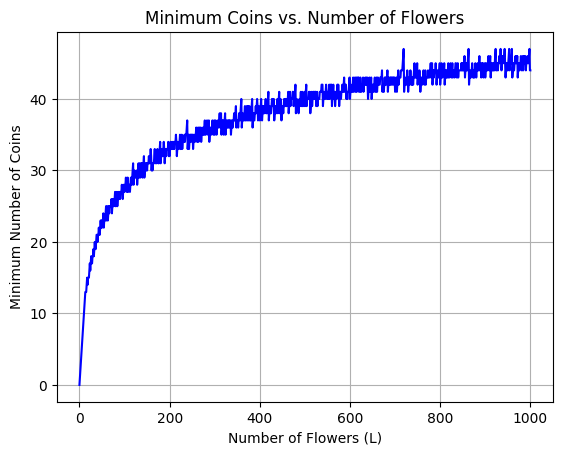

In [45]:
# A COMPLETER
import matplotlib.pyplot as plt
import numpy as np

# create a list of values for the number of flowers (L) from 0 to 1000
L_values = list(range(1001))
min_coins = []                      # create an empty list to store the minimum coin counts

# iterate through each value of L
for L in L_values:
    if L == 0:
        # if L is 0, you don't need any coins to obtain 0 flowers
        min_coins.append(0)
    elif L == 1:
        # if L is 1, you can obtain 1 flower with 1 coin
        min_coins.append(1)
    else:
        # for L > 1, use the min_well_coin function to calculate the minimum coins needed
        min_coins.append(min_well_coin(L))

# plot the results
plt.plot(L_values, min_coins, 'b')
plt.plot(L_values, np.log(L_values), 'g')
plt.plot(L_values, np.exp(-L_values), 'b')
plt.xlabel('Number of Flowers (L)')
plt.ylabel('Minimum Number of Coins')
plt.title('Minimum Coins vs. Number of Flowers')
plt.grid()
plt.show()

### Explications

The line in the graph shows a steep increase at the beginning, indicating that the minimum number of coins increases rapidly with the number of flowers at first. However, as the number of flowers continues to increase, the line levels off, suggesting that the minimum number of coins required increases at a slower rate. This could imply that after a certain point, obtaining additional flowers requires fewer additional coins. The graphe looks like a negative exponential graphe.

Quelle est la complexité temporelle de cet algorithme ? Que pouvez-vous en dire au regard de la recherche exhaustive codée plus tôt en lab ?

### Explications

The time complexity of this new algorithm is more efficient compared to the exhaustive search approach used earlier. In the exhaustive search, the time complexity was O(3^L), which is exponential and can become very slow for larger values of L. However, the dynamic programming approach implemented in this algorithm significantly improves the time complexity.

The time complexity of the provided dynamic programming algorithm is approximately O(L^2), which is quadratic. This means that the algorithm's runtime grows at a much slower rate as L increases compared to the exponential growth of the exhaustive search. As a result, the dynamic programming algorithm is much more efficient and suitable for larger values of L, making it a better choice for solving this problem.